In [1]:
# Membaca Dataset
import pandas as pd

# Dataset 1 : Data Jumlah Kunjungan Pasien Dokter Gigi
df_kunjungan = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/kunjungan_dokter_gigi_kota_x_dqlab.tsv",sep="\t")
print("Jumlah data kunjungan:", df_kunjungan.shape)
print(df_kunjungan.head())

# Dataset 2 : Data Jumlah  Penjualan
df_penjualan = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/tingkat_penjualan_kota_x_dqlab.tsv",sep="\t")
print("Jumlah data penjualan:", df_penjualan.shape)
print(df_penjualan.head())

Jumlah data kunjungan: (24, 3)
   Bulan  Tahun  tingkat kunjungan ke dokter gigi
0      1   1996                                37
1      2   1996                                32
2      3   1996                                56
3      4   1996                                43
4      5   1996                                52
Jumlah data penjualan: (24, 6)
   No  Bulan  Tahun  penjualan permen  penjualan sereal  penjualan buah pisang
0   1      1   1996            200661             10324                 112146
1   2      2   1996            297141             13150                 175417
2   3      3   1996            235586              5398                 104645
3   4      4   1996            299498              7609                 112283
4   5      5   1996            395824              5190                 137083


In [2]:
# Membuat sebuah kolom dengan format YYYY-mm
df_kunjungan["Periode"] = df_kunjungan["Tahun"].map(str) + "-" + df_kunjungan["Bulan"].map(str)
df_penjualan["Periode"] = df_penjualan["Tahun"].map(str) + "-" + df_penjualan["Bulan"].map(str)

# Menghapus kolom Bulan dan Tahun
df_kunjungan.drop(columns=["Bulan","Tahun"],inplace=True)
df_penjualan.drop(columns=["Bulan","Tahun","No"],inplace=True)

print(df_kunjungan.head())
print(df_penjualan.head())

   tingkat kunjungan ke dokter gigi Periode
0                                37  1996-1
1                                32  1996-2
2                                56  1996-3
3                                43  1996-4
4                                52  1996-5
   penjualan permen  penjualan sereal  penjualan buah pisang Periode
0            200661             10324                 112146  1996-1
1            297141             13150                 175417  1996-2
2            235586              5398                 104645  1996-3
3            299498              7609                 112283  1996-4
4            395824              5190                 137083  1996-5


In [3]:
# Menggabungkan kedua dataset 
df_kunjungan.set_index("Periode",inplace=True)
df_penjualan.set_index("Periode",inplace=True)
df = df_kunjungan.join(df_penjualan)
df.head()

,tingkat kunjungan ke dokter gigi,penjualan permen,penjualan sereal,penjualan buah pisang
Periode,,,,
1996-1,37,200661,10324,112146
1996-2,32,297141,13150,175417
1996-3,56,235586,5398,104645
1996-4,43,299498,7609,112283
1996-5,52,395824,5190,137083


In [7]:
# Cara Ringkas : Membuat kolom periode + menghapus kolom + menggabungkan kedua dataset
import pandas as pd
df_kunjungan = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/kunjungan_dokter_gigi_kota_x_dqlab.tsv",sep="\t")
df_penjualan = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/tingkat_penjualan_kota_x_dqlab.tsv",sep="\t")
df_kunjungan["Periode"] = df_kunjungan["Tahun"].map(str) + "-" + df_kunjungan["Bulan"].map(str)
df_penjualan["Periode"] = df_penjualan["Tahun"].map(str) + "-" + df_penjualan["Bulan"].map(str)

# Metode Chaining
df = df_kunjungan.drop(columns=["Tahun","Bulan"]).set_index("Periode").join(df_penjualan.drop(columns=["Bulan","Tahun","No"]).
                                                                            set_index('Periode'))
df.head()

,tingkat kunjungan ke dokter gigi,penjualan permen,penjualan sereal,penjualan buah pisang
Periode,,,,
1996-1,37,200661,10324,112146
1996-2,32,297141,13150,175417
1996-3,56,235586,5398,104645
1996-4,43,299498,7609,112283
1996-5,52,395824,5190,137083


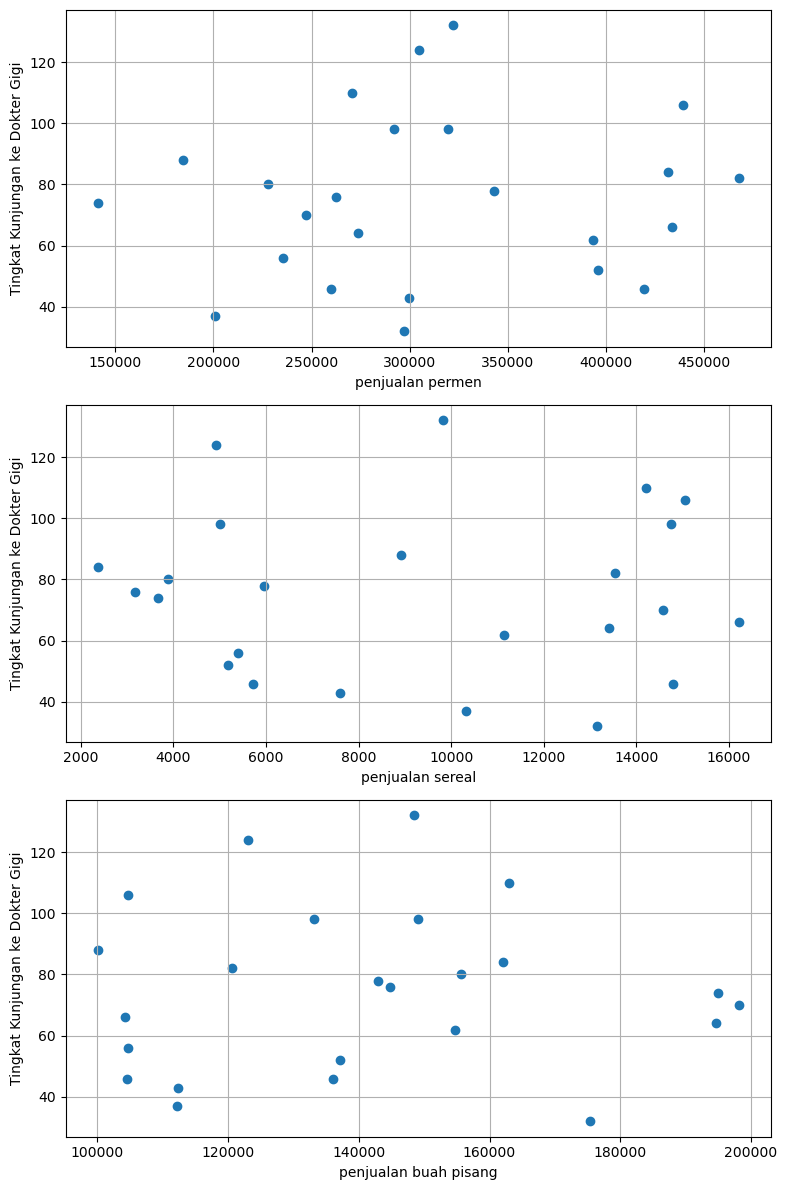

In [13]:
# Mengidentifikasi hubungan antar variabel dengan menggunakan teknik visualisasi
import matplotlib.pyplot as plt
fig,ax = plt.subplots(len(df.columns)-1,figsize=(8,12)) 
for axs, col in zip(ax,df.columns[1:]) :
    axs.scatter(df[col],df["tingkat kunjungan ke dokter gigi"])
    axs.set_xlabel(col)
    axs.set_ylabel("Tingkat Kunjungan ke Dokter Gigi")
    axs.grid()
plt.tight_layout()
plt.show()

In [15]:
# Mengidentifikasi korelasi antar variabel : Korelasi Pearson
print("Korelasi Pearson :")
df.corr()["tingkat kunjungan ke dokter gigi"] # Mencari koefisien korelasi pearson berdasarkan tingkat kunjungan ke dokter gigi

Korelasi Pearson :


tingkat kunjungan ke dokter gigi    1.000000
penjualan permen                    0.083333
penjualan sereal                   -0.027465
penjualan buah pisang               0.028650
Name: tingkat kunjungan ke dokter gigi, dtype: float64

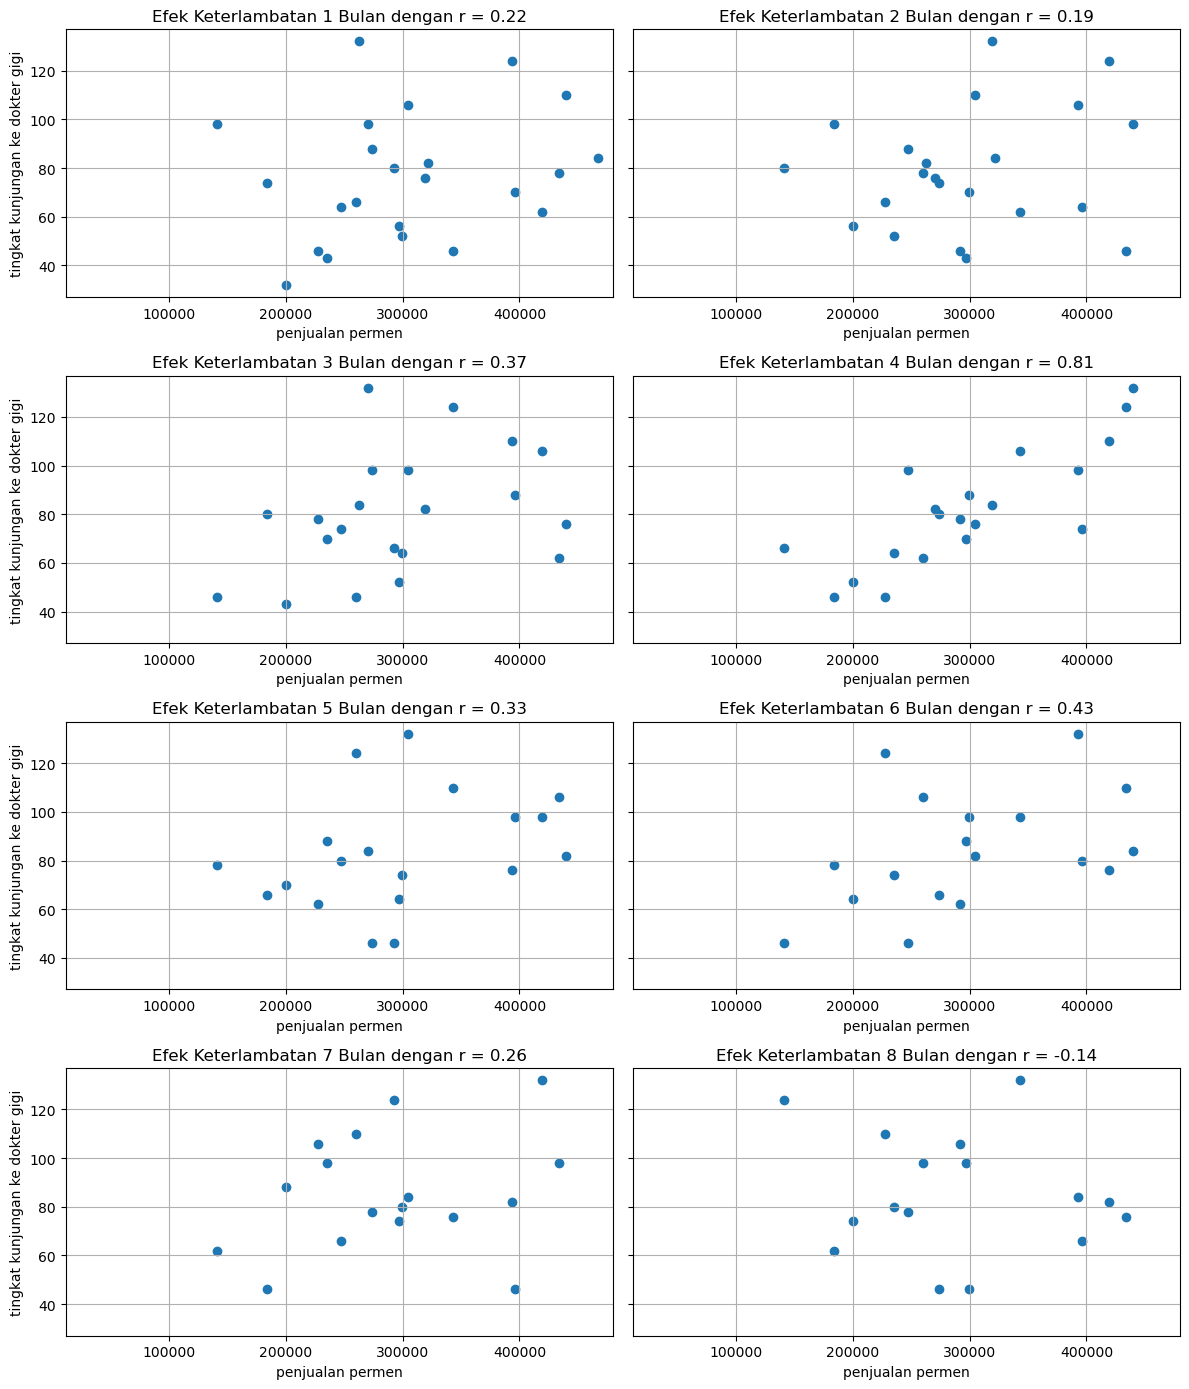

In [26]:
# Mengimplementasikan Delay Effect untuk melihat hubungan tingkat kunjungan ke dokter gigi dan penjualan permen
from scipy.stats import pearsonr
delays = 8
n_cols = 2
col_x = "penjualan permen"
col_y = "tingkat kunjungan ke dokter gigi"
fig, ax = plt.subplots(round(delays/2),n_cols,figsize=(12,3.5 * round(delays/2)),sharey=True)
for i in range(delays) :
    x = df[col_x][:-(i+1)]
    y = df[col_y][i+1:]
    axs = ax[i//n_cols,i%n_cols]
    axs.scatter(x,y)
    axs.set_xlabel(col_x)
    if i % n_cols == 0 :
        axs.set_ylabel(col_y)
    axs.set_title("Efek Keterlambatan %d Bulan dengan r = %.2f"%(i+1,pearsonr(x,y)[0]))
    axs.grid()
    axs.set_xlim([12000,480000])
plt.tight_layout()
plt.show()

In [31]:
# Mencari persamaan linear untuk Delayed Effect = 4 bulan
import numpy as np
x = df["penjualan permen"][:-4].to_numpy()
y = df["tingkat kunjungan ke dokter gigi"][4:].to_numpy()
x_mean = x.mean()
y_mean = y.mean()
pembilang = ((x-x_mean)*(y-y_mean)).sum()
penyebut = ((x-x_mean)**2).sum()
m = pembilang/penyebut
b = y_mean - (m*x_mean)
persamaan = "Diperoleh persamaan regresi linear = %.4e * x + %.4f" % (m,b)
print(persamaan)

Diperoleh persamaan regresi linear = 2.3035e-04 * x + 12.9341


In [45]:
# Prediksi Tingkat Kunjungan
x = df["penjualan permen"][-4:].to_numpy()
y = m * x + b
for i, kunjungan in enumerate(y) :
    print("Prediksi Periode 1998-0%d : %d kunjungan"%(i+1,kunjungan))

Prediksi Periode 1998-01 : 73 kunjungan
Prediksi Periode 1998-02 : 87 kunjungan
Prediksi Periode 1998-03 : 120 kunjungan
Prediksi Periode 1998-04 : 112 kunjungan


In [46]:
# Prediksi menggunakan library scikit learn
from sklearn.linear_model import LinearRegression

# Training Model
x = df["penjualan permen"][:-4].to_numpy().reshape(-1,1)
y = df["tingkat kunjungan ke dokter gigi"][4:].to_numpy().reshape(-1,1)
model = LinearRegression()
model.fit(x,y)

# Predicting
x_new = df["penjualan permen"][-4:].to_numpy().reshape(-1,1)
y_new = model.predict(x_new)

print("Persamaan regresi linear = %.4e * x + %.4f" % (model.coef_, model.intercept_))
for i, kunjungan in enumerate(y_new) :
    print("Prediksi Periode 1998-0%d : %d kunjungan"%(i,kunjungan))

Persamaan regresi linear = 2.3035e-04 * x + 12.9341
Prediksi Periode 1998-00 : 73 kunjungan
Prediksi Periode 1998-01 : 87 kunjungan
Prediksi Periode 1998-02 : 120 kunjungan
Prediksi Periode 1998-03 : 112 kunjungan


In [50]:
# Mini Project = memprediksi data dengan regresi linear menggunakan library numpy dan scipy
import pandas as pd
import numpy as np
from scipy.stats import linregress

df_kunjungan = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/kunjungan_dokter_gigi_kota_x_dqlab.tsv",sep="\t")
df_penjualan = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/tingkat_penjualan_kota_x_dqlab.tsv",sep="\t")
df_kunjungan["Periode"] = df_kunjungan["Tahun"].map(str) + "-" + df_kunjungan["Bulan"].map(str)
df_penjualan["Periode"] = df_penjualan["Tahun"].map(str) + "-" + df_penjualan["Bulan"].map(str)
df = df_kunjungan.drop(columns=["Tahun","Bulan"]).set_index("Periode").join(df_penjualan.drop(columns=["Bulan","Tahun","No"]).
                                                                            set_index('Periode'))

x = df["penjualan permen"][:-4]
y = df["tingkat kunjungan ke dokter gigi"][4:]

# Mencari regresi linear menggunakan library numpy
hasil_numpy = np.polyfit(x,y,deg=1)
print("Regresi Linear Numpy : %.4e * x + %.4f"%(hasil_numpy[0],hasil_numpy[1]))

# Mencari regresi linear menggunakan library scipy
hasil_scipy = linregress(x,y)
print("Regresi Linear Scipy : %.4e * x + %.4f"%(hasil_scipy.slope,hasil_scipy.intercept))

# Memprediksi data (Karena Persamaan Regresi Linear sama, maka dipilih salah satu yaitu hasil dari scipy)
x_new = df["penjualan permen"][-4:].to_numpy()
y_new = hasil_scipy.slope * x_new + hasil_scipy.intercept
for i, kunjungan in enumerate(y_new) :
    print("Kunjungan Periode 1998-0%d : %d"%(i+1,kunjungan))

Regresi Linear Numpy : 2.3035e-04 * x + 12.9341
Regresi Linear Scipy : 2.3035e-04 * x + 12.9341
Kunjungan Periode 1998-01 : 73
Kunjungan Periode 1998-02 : 87
Kunjungan Periode 1998-03 : 120
Kunjungan Periode 1998-04 : 112


Sumber Belajar : www.dqlab.id